In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_data.csv')

In [3]:




total_revenue = df[df['order_status'] == 'Delivered']['total_amount'].sum()

print(f'the total revenue of delivered order was {total_revenue}')




the total revenue of delivered order was 8664.66


In [4]:
category_revenue = df[df['order_status'] != 'Cancelled'].groupby('category')['total_amount'].sum().sort_values(ascending=False)
category_revenue

category
Furniture      4141.82
Electronics    3835.78
Stationery      687.06
Name: total_amount, dtype: float64

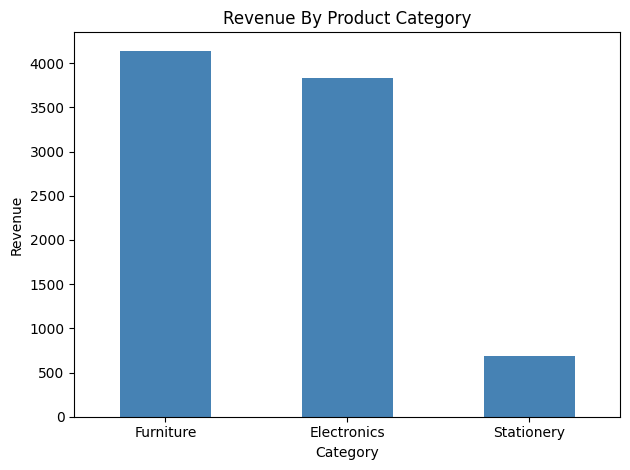

In [5]:
category_revenue.plot(kind='bar',color='steelblue')
plt.title('Revenue By Product Category')

plt.ylabel('Revenue')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




In [6]:
#average customer spend per order


avg_customer_spend = df[df['order_status'] == 'Delivered']['total_amount'].mean()

print(f'Average customer spend was per order {avg_customer_spend:.2f}')






Average customer spend was per order 176.83


In [7]:
total_orders = len(df)

cancelled_orders = len(df[df['order_status'] == 'Cancelled'])
cancellation_rate = (cancelled_orders / total_orders) * 100

print(f'Total Orders:{total_orders}')
print(f'Cancelation rate: {cancellation_rate:.2f}%')
print(f'Cancelled orders: {cancelled_orders}')

Total Orders:50
Cancelation rate: 2.00%
Cancelled orders: 1


In [8]:
#most popular payment method

payment_method  = df[df['order_status'] != 'Cancelled']['payment_method'].value_counts()

payment_percentage = (payment_method / payment_method.sum()) * 100

for method,count in payment_method.items():
    print(f'{method}: {count} orders ({payment_percentage[method]:.2f}%)')
    

Credit Card: 25 orders (51.02%)
PayPal: 15 orders (30.61%)
Debit Card: 9 orders (18.37%)


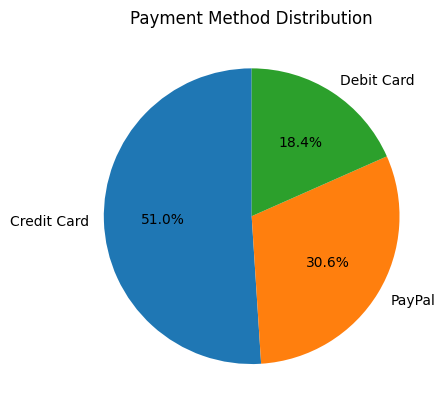

In [9]:
payment_method.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()


Average Delivey Time: 6.0 days
Average Delivery day by Category:


Text(0.5, 1.0, 'Average delivery day per Category')

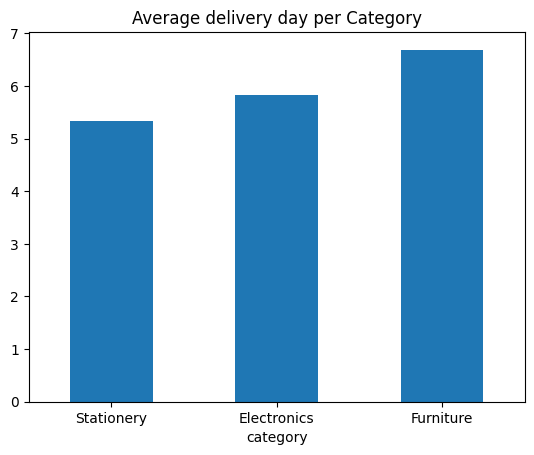

In [10]:
#What is the average delivery time?



df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])


df['delivery_days'] =(df['delivery_date'] - df['order_date']).dt.days

avg_delivery = df[df['order_status'] == 'Delivered']['delivery_days'].mean()
print(f'Average Delivey Time: {avg_delivery:.1f} days')

category_delivery = df[df['order_status'] != 'Cancelled'].groupby(
    'category'
)['delivery_days'].mean().sort_values()



print('Average Delivery day by Category:')
category_delivery.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Average delivery day per Category')








Top 5 state with Revenue


Text(0, 0.5, 'Revenue')

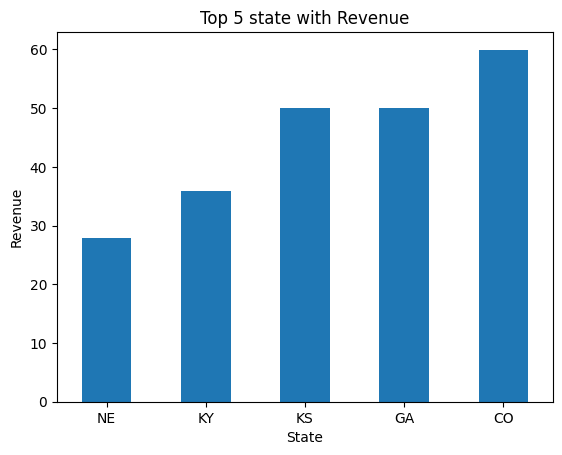

In [11]:
#state or cities generate most revenues


state_revenue = df[df['order_status'] == 'Delivered'].groupby('state')['total_amount'].sum().sort_values()


print('Top 5 state with Revenue')
state_revenue.head(5).plot(kind='bar')
plt.title('Top 5 state with Revenue')
plt.xticks(rotation=0)
plt.xlabel('State')
plt.ylabel('Revenue')






In [12]:
city_revenue = df[df['order_status'] == 'Delivered'].groupby('city')['total_amount'].sum().sort_values()
print('Top 5 Cities by Revenue:')
city_revenue.head()

Top 5 Cities by Revenue:


city
Omaha            27.92
Mesa             29.95
Fort Worth       31.92
San Francisco    31.96
El Paso          34.95
Name: total_amount, dtype: float64

In [13]:
#What is the return rate and which products are returned most?


total_delivered = len(df[df['order_status'] == 'Delivered'])
total_returns = len(df[(df['return_status'] == 'Yes') & (df['order_status'] == 'Delivered')])

return_rate = total_returns / total_delivered * 100


print(f'total Delivered: {total_delivered}')
print(f'total Orders:{total_returns}')
print(f'Return Rate: {return_rate:.2f}%')









total Delivered: 49
total Orders:1
Return Rate: 2.04%


In [14]:
# what products have returned give name

returned_product = df[(df['order_status'] == 'Delivered') & (df['return_status'] == 'Yes')][['product_name','category','total_amount']]
print('Returned products')
print(returned_product)


Returned products
      product_name   category  total_amount
49  Bean Bag Chair  Furniture        129.99


In [15]:
sg_rev = df[df['order_status'] == 'Delivered'].groupby('customer_segment')['total_amount'].agg(
    ['sum','mean','count']
)

sg_rev.columns = ['Total_Revenue','Average_Revenue','Order_Count']
sg_rev['Rev%'] = (sg_rev['Total_Revenue'] / sg_rev['Total_Revenue'].sum() * 100)





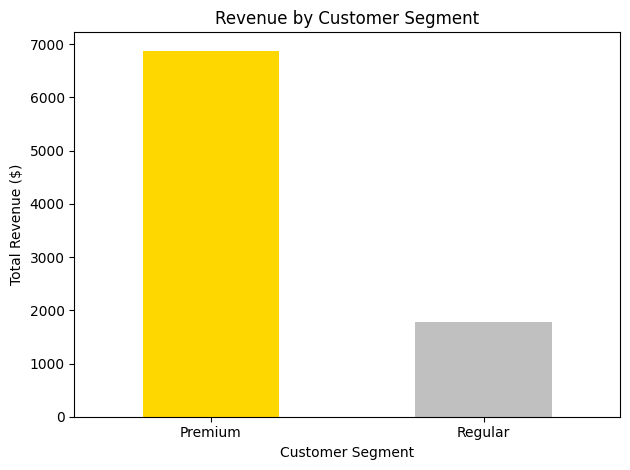

In [17]:
sg_rev['Total_Revenue'].plot(kind='bar',color=['gold','silver'])
plt.title('Revenue by Customer Segment')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Customer Segment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()